In [5]:
from nilmtk import DataSet
from nilmtk.utils import print_dict

refit = DataSet(r'C:\Users\Ashraf\Desktop\Codes\Data excel and HDF\Lstm_Pred_Nilm_Converted_2Days.hdf')

In [6]:
print_dict(refit.buildings[2].metadata)
refit.buildings[2].elec

MeterGroup(meters=
  ElecMeter(instance=1, building=2, dataset='REFIT', site_meter, appliances=[])
  ElecMeter(instance=2, building=2, dataset='REFIT', appliances=[Appliance(type='fridge freezer', instance=1)])
  ElecMeter(instance=3, building=2, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=4, building=2, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=5, building=2, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=6, building=2, dataset='REFIT', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=7, building=2, dataset='REFIT', appliances=[Appliance(type='toaster', instance=1)])
  ElecMeter(instance=8, building=2, dataset='REFIT', appliances=[Appliance(type='audio system', instance=1)])
  ElecMeter(instance=9, building=2, dataset='REFIT', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=10, building

In [7]:
# Explore load profile for all the buildings in Refit
%matplotlib inline

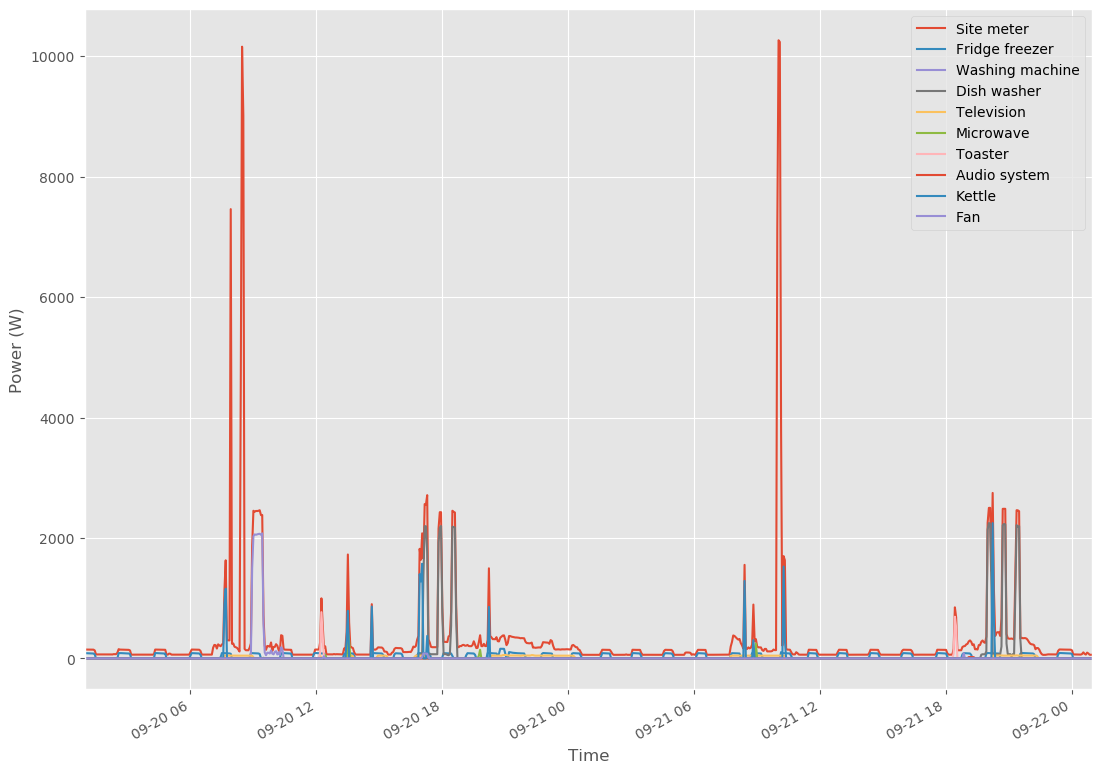

In [8]:
# House 2
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import nilmtk
from nilmtk import DataSet, MeterGroup

plt.style.use('ggplot')
rcParams['figure.figsize'] = (13, 10)
elec = refit.buildings[2].elec
elec.plot()
plt.xlabel("Time");

In [9]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.528716341405959

In [10]:
elec.mains().total_energy()

active    14.107714
dtype: float64

In [11]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

9/9 ElecMeter(instance=10, building=2, dataset='REFIT', appliances=[Appliance(type='fan', instance=1)])])e=1)]))])

,"(2, 2, REFIT)","(3, 2, REFIT)","(4, 2, REFIT)","(5, 2, REFIT)","(6, 2, REFIT)","(7, 2, REFIT)","(8, 2, REFIT)","(9, 2, REFIT)","(10, 2, REFIT)"
active,1.583024,1.208249,2.879964,0.56155,0.083077,0.151916,0.007171,0.960009,0.024019
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


9/9 ElecMeter(instance=10, building=2, dataset='REFIT', appliances=[Appliance(type='fan', instance=1)])])e=1)]))])

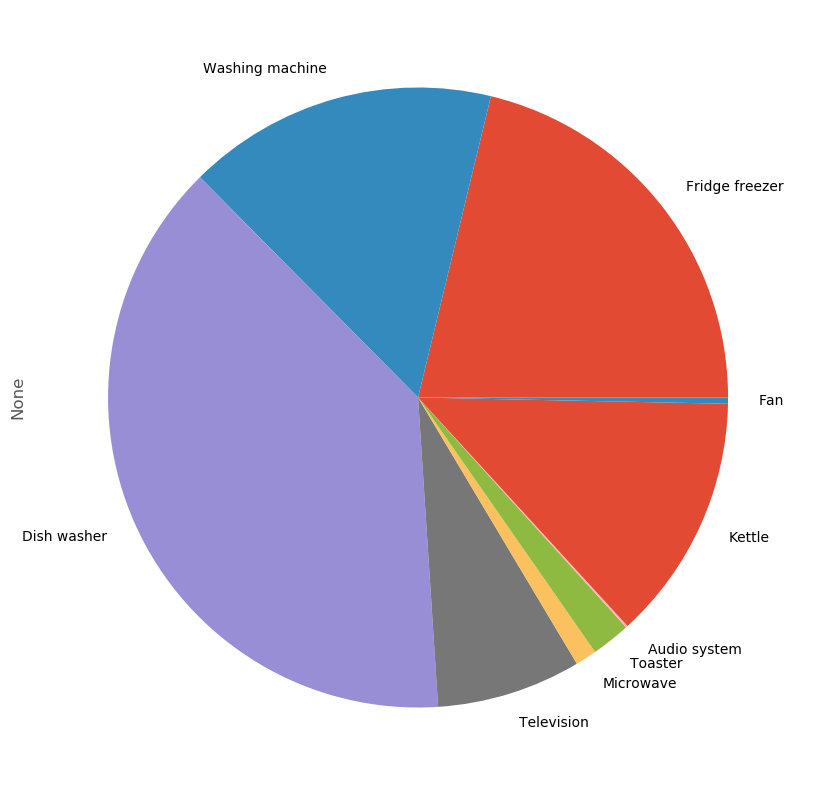

In [12]:
fraction = elec.submeters().fraction_per_meter().dropna()
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

(<networkx.classes.digraph.DiGraph at 0x201c68c8248>,
 <matplotlib.axes._axes.Axes at 0x201c6e75488>)

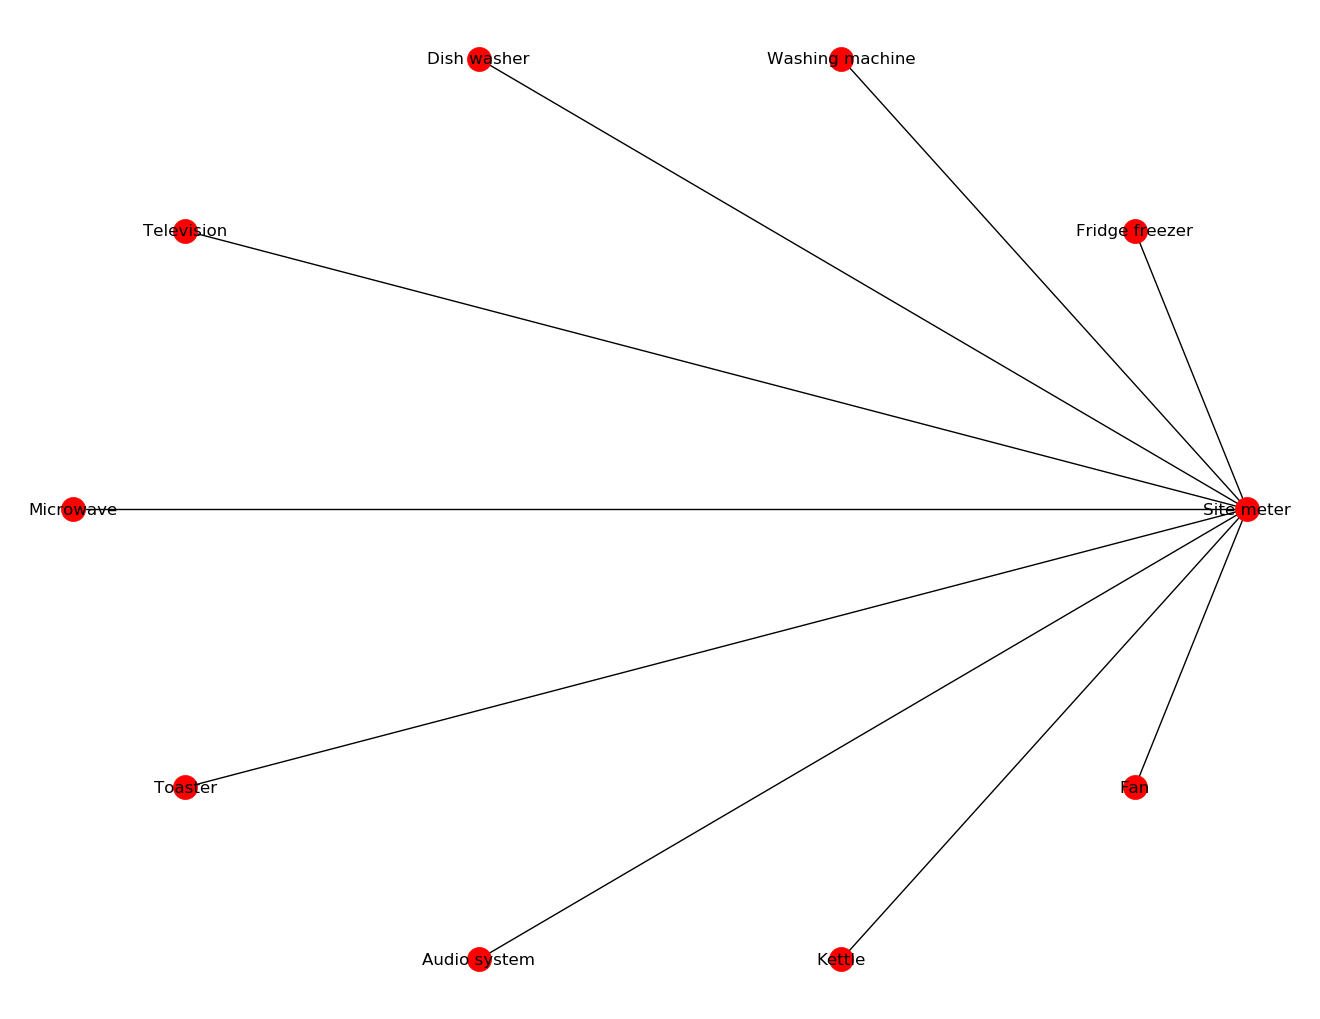

In [13]:
elec.draw_wiring_graph()

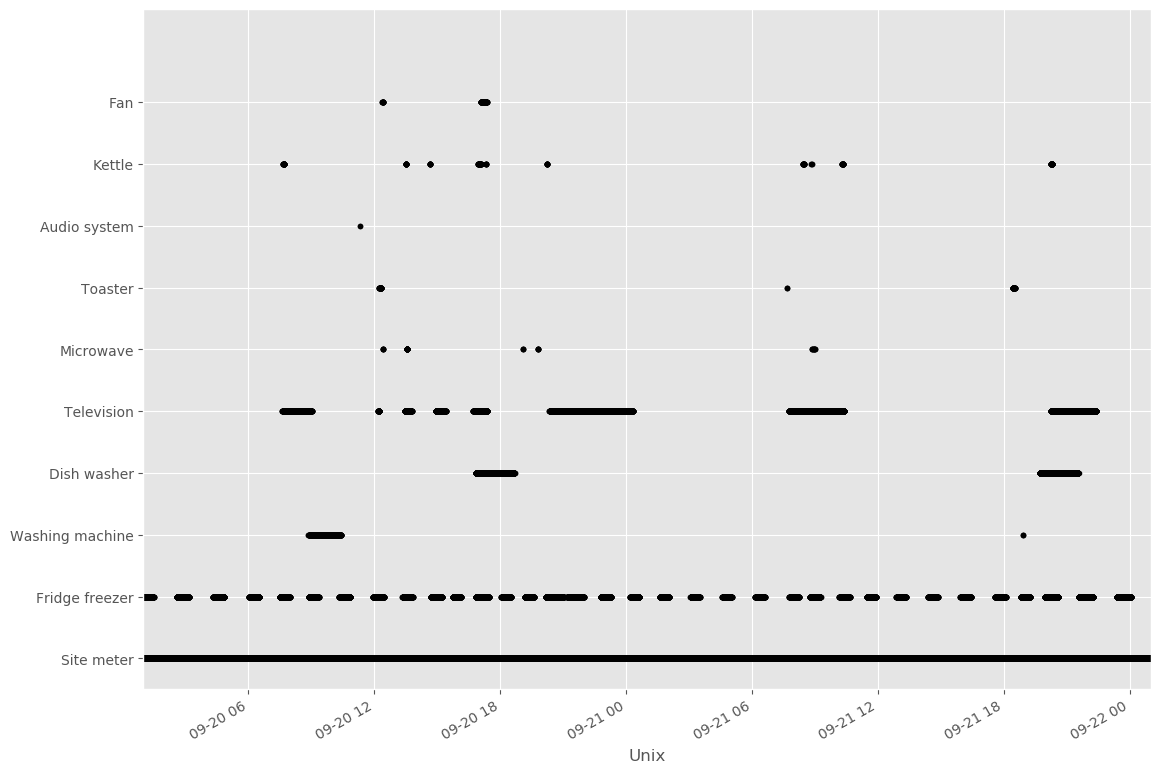

In [14]:
elec.plot_when_on(on_power_threshold = 40)